In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 9)
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loading csv file
df= pd.read_csv('clean_metal.csv')
df.index = pd.to_datetime(df.Date, format="%Y/%m/%d")
df.head()

,Date,p0,Price,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,...,f128_settle,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2008-12-01,444.511058,457.032497,457.032497,56.29,51.91,0.6421,31.40,31.83,1.4924,...,514.4,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0
2008-12-02,2008-12-02,446.908899,465.530103,459.323035,55.30,51.78,0.6354,30.77,31.20,1.4895,...,504.8,504.8,12185.0,12215.0,28260.0,27040.0,11190.0,10300.0,9510.0,9630.0
2008-12-03,2008-12-03,453.484820,482.060575,459.696940,55.21,51.21,0.6387,30.58,30.98,1.4734,...,497.7,497.7,11715.0,11830.0,27800.0,26530.0,10605.0,10050.0,9500.0,9590.0
2008-12-04,2008-12-04,447.532919,472.395859,459.964389,57.62,53.94,0.6413,29.50,29.87,1.4746,...,490.1,490.1,11250.0,11240.0,26760.0,25530.0,10055.0,9735.0,9145.0,9225.0
2008-12-05,2008-12-05,447.084228,471.922241,459.503235,56.75,53.58,0.6404,28.55,28.93,1.4696,...,496.3,496.3,10685.0,10590.0,25450.0,24270.0,9965.0,9150.0,8665.0,8715.0


In [3]:
df = df.set_index(pd.DatetimeIndex(df['Date']))
p1=df.copy()
#p1.set_index('Date', inplace=True)
del p1['Date']
p1=p1.resample('D').interpolate()[::7]
p1['Constant']=1
p1.head()

,p0,Price,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,...,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,Constant
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,444.511058,457.032497,457.032497,56.290,51.910,0.6421,31.400,31.830,1.4924,1.4938,...,516.4,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0,1
2008-12-08,447.227191,472.073147,459.650169,54.670,52.720,0.6634,29.770,30.160,1.4932,1.4947,...,518.4,10460.0,10565.0,25150.0,23900.0,9865.0,9190.0,8900.0,8970.0,1
2008-12-15,449.842555,468.585995,459.839056,54.840,52.630,0.6609,30.550,30.910,1.5225,1.5226,...,513.4,10710.0,10790.0,26350.0,24560.0,10360.0,9620.0,9270.0,9270.0,1
2008-12-22,455.790506,499.496445,459.536729,45.510,45.630,0.6791,30.940,31.250,1.4839,1.4840,...,499.9,10920.0,10915.0,24810.0,23210.0,10510.0,10365.0,9750.0,9705.0,1
2008-12-29,468.490105,505.969313,480.983175,46.508,45.452,0.6854,32.338,32.658,1.4537,1.4538,...,527.1,11225.0,11190.0,23726.0,22816.0,10761.0,10610.0,9815.0,9778.0,1


In [4]:
p1.shape

(494, 142)

In [5]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression

In [6]:
p1.Price.size

494

In [7]:
p1.Price = p1.Price.shift(int(-0.1*p1.Price.size))

In [8]:
p1.tail()

,p0,Price,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,...,f129_settle,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,Constant
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-16,545.397156,NaN,549.477434,17.275,17.575,0.7781,31.180,31.4500,1.43690,1.44280,...,896.70,14495.0,14570.0,50270.0,50400.0,10870.0,10845.0,23645.0,23495.0,1
2018-04-23,558.634977,NaN,575.025245,16.825,17.025,0.7602,31.040,31.3000,1.39700,1.40300,...,911.40,14880.0,14935.0,51550.0,51720.0,11235.0,11345.0,24565.0,24450.0,1
2018-04-30,558.663332,NaN,577.329149,16.731,17.101,0.7538,30.604,30.7492,1.37058,1.37668,...,917.52,14443.4,14523.0,51218.8,51400.4,11074.2,11174.0,23842.2,23693.2,1
2018-05-07,555.734038,NaN,578.554035,16.325,16.775,0.7517,30.870,30.9800,1.35850,1.36450,...,929.70,14630.0,14705.0,51100.0,51280.0,11510.0,11560.0,23570.0,23470.0,1
2018-05-14,555.885726,NaN,582.870470,14.475,14.975,0.7527,31.250,31.3500,1.35850,1.36440,...,950.70,14590.0,14660.0,51370.0,51570.0,11400.0,11495.0,23755.0,23665.0,1


In [9]:
X = p1.iloc[:,2:]
X['p0']=p1.p0
Y = p1['Price']

In [10]:
X.head()

,p2,f000_settle,f001_settle,f002_settle,f003_settle,f004_settle,f005_settle,f006_settle,f007_settle,f008_settle,...,f130_settle,f131_settle,f132_settle,f133_settle,f134_settle,f135_settle,f136_settle,f137_settle,Constant,p0
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,457.032497,56.290,51.910,0.6421,31.400,31.830,1.4924,1.4938,348.75,360.0,...,12545.0,12560.0,28410.0,27300.0,11655.0,10690.0,9540.0,9650.0,1,444.511058
2008-12-08,459.650169,54.670,52.720,0.6634,29.770,30.160,1.4932,1.4947,330.00,340.5,...,10460.0,10565.0,25150.0,23900.0,9865.0,9190.0,8900.0,8970.0,1,447.227191
2008-12-15,459.839056,54.840,52.630,0.6609,30.550,30.910,1.5225,1.5226,375.25,386.5,...,10710.0,10790.0,26350.0,24560.0,10360.0,9620.0,9270.0,9270.0,1,449.842555
2008-12-22,459.536729,45.510,45.630,0.6791,30.940,31.250,1.4839,1.4840,381.75,392.0,...,10920.0,10915.0,24810.0,23210.0,10510.0,10365.0,9750.0,9705.0,1,455.790506
2008-12-29,480.983175,46.508,45.452,0.6854,32.338,32.658,1.4537,1.4538,393.50,404.0,...,11225.0,11190.0,23726.0,22816.0,10761.0,10610.0,9815.0,9778.0,1,468.490105


In [11]:
X_train = X.iloc[:int(-0.1*p1.Price.size),:]
X_test = X.iloc[int(-0.1*p1.Price.size):,:]
y_train = p1['Price'].iloc[:int(-0.1*p1.Price.size)]
y_test = p1['Price'].iloc[int(-0.1*p1.Price.size):]

In [12]:
print(X.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(494, 141)
(445, 141)
(445,)
(49, 141)
(49,)


In [13]:
lasso = Lasso(alpha=1e-15)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("number of features used: ", coeff_used)

lasso.predict

training score: 0.9820533946247527
number of features used:  140


<bound method LinearModel.predict of Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)>

In [14]:
ridge = Ridge(alpha=1e-15)
ridge.fit(X_train,y_train)
train_score=ridge.score(X_train,y_train)
coeff_used = np.sum(ridge.coef_!=0)
print ("training score:", train_score)
print ("number of features used: ", coeff_used)

ridge.predict

training score: 0.9876754541906425
number of features used:  140


<bound method LinearModel.predict of Ridge(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [15]:
elasti = ElasticNet(alpha=1e-15)
elasti.fit(X_train,y_train)
train_score=elasti.score(X_train,y_train)
coeff_used = np.sum(ridge.coef_!=0)
print ("training score:", train_score)
print ("number of features used: ", coeff_used)

elasti.predict

training score: 0.9820533946247505
number of features used:  140


<bound method LinearModel.predict of ElasticNet(alpha=1e-15, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)>

In [16]:
#p1.Price=p1.Price.shift(int(-0.05*df.Price.size))
a1=p1.iloc[:,1:2]
a1.head()

,Price
Date,
2008-12-01,488.235955
2008-12-08,498.324041
2008-12-15,498.214564
2008-12-22,504.569610
2008-12-29,504.562219


In [17]:
a1['Lasso_Predict']=pd.DataFrame(lasso.predict(X), index=p1.index)
a1['Ridge_Predict']=pd.DataFrame(ridge.predict(X), index=p1.index)
a1['ElasticNet_Predict']=pd.DataFrame(elasti.predict(X), index=p1.index)
a1.tail()

,Price,Lasso_Predict,Ridge_Predict,ElasticNet_Predict
Date,,,,
2018-04-16,NaN,559.154813,549.173724,559.154813
2018-04-23,NaN,576.659870,559.154459,576.659870
2018-04-30,NaN,597.741943,586.301954,597.741943
2018-05-07,NaN,608.560144,606.810502,608.560144
2018-05-14,NaN,598.195001,610.276501,598.195001


In [18]:
a1.head()

,Price,Lasso_Predict,Ridge_Predict,ElasticNet_Predict
Date,,,,
2008-12-01,488.235955,475.009357,472.748400,475.009357
2008-12-08,498.324041,493.557923,498.676974,493.557923
2008-12-15,498.214564,502.859471,505.684552,502.859471
2008-12-22,504.569610,492.420949,508.123176,492.420949
2008-12-29,504.562219,501.857582,503.924963,501.857582


<function matplotlib.pyplot.show(*args, **kw)>

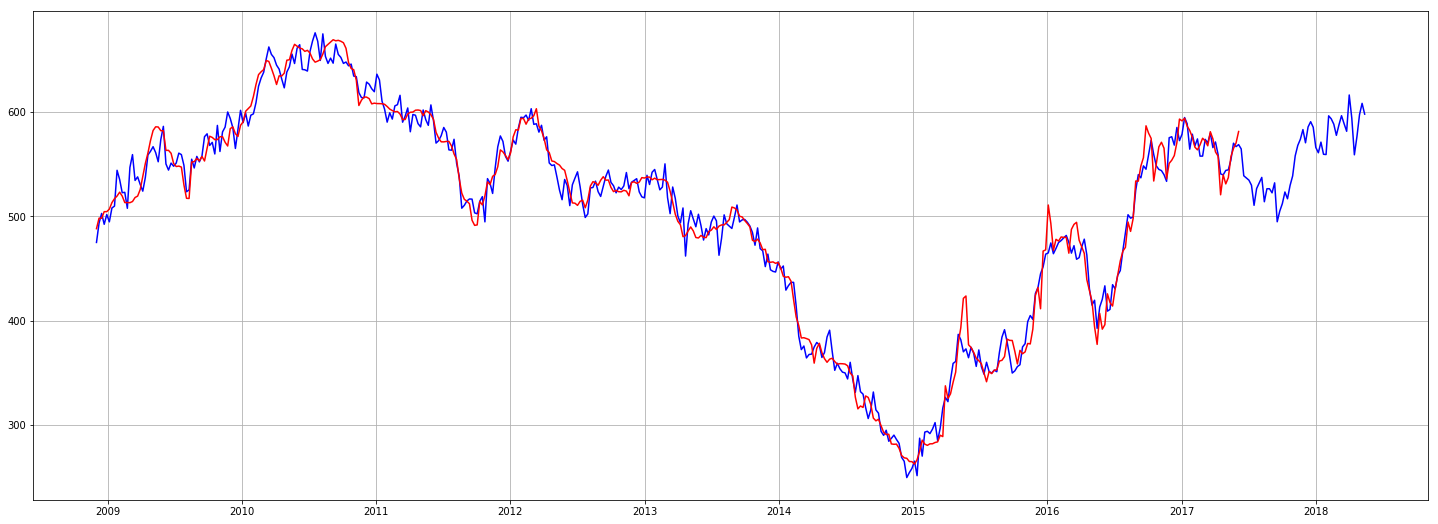

In [19]:
pylab.rcParams['figure.figsize'] = (25, 9)
plot(a1.Lasso_Predict, color='blue')
plot(a1.Price, color='red')
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

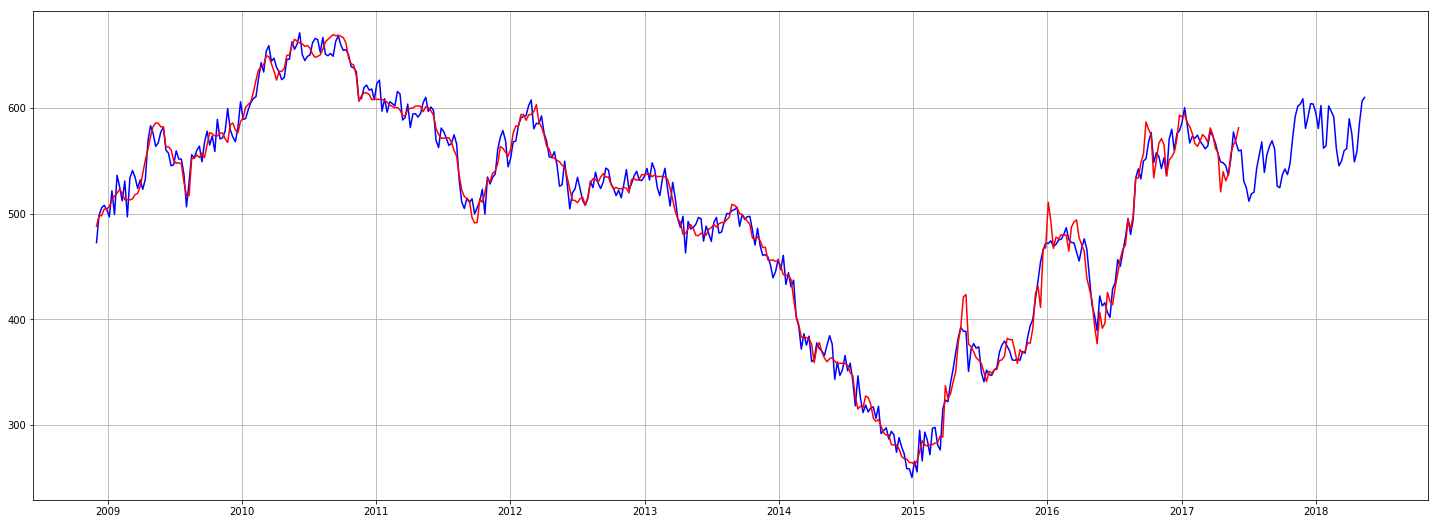

In [20]:
pylab.rcParams['figure.figsize'] = (25, 9)
plot(a1.Ridge_Predict, color='blue')
plot(a1.Price, color='red')
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

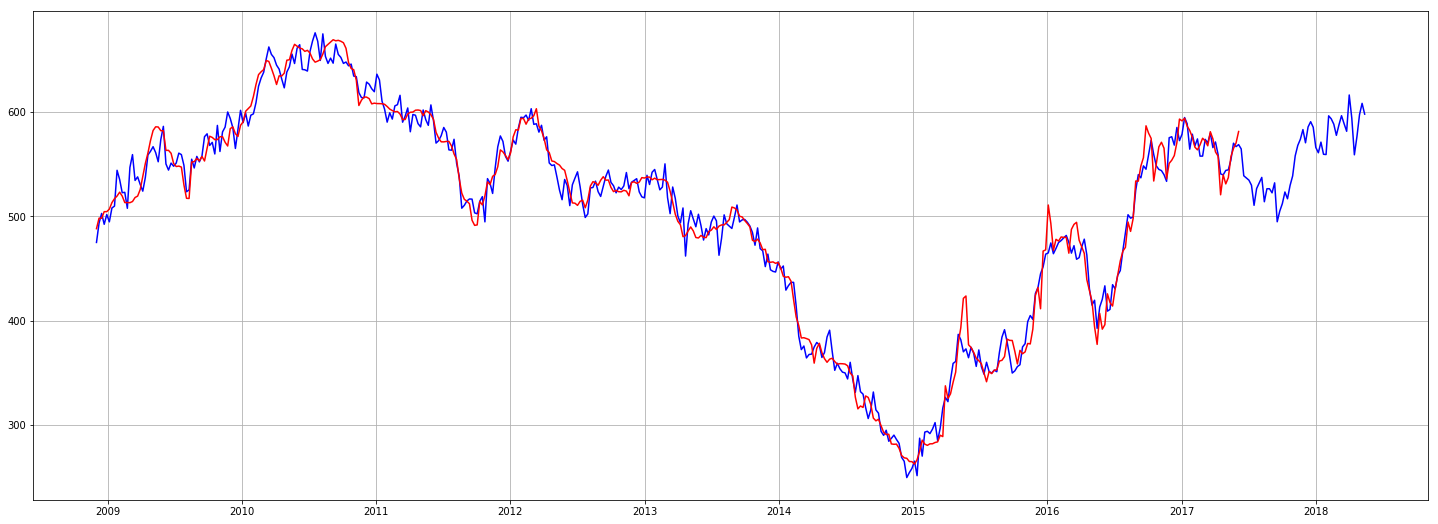

In [21]:
pylab.rcParams['figure.figsize'] = (25, 9)
plot(a1.ElasticNet_Predict, color='blue')
plot(a1.Price, color='red')
plt.grid()
plt.show

In [22]:
def mean_absolute_percentage_error(test,predictions): 
    test = np.array(test)
    predictions = np.array(predictions)
    return np.mean(np.abs((test - predictions) / test)) * 100

# Lasso MAPE

In [23]:
b=a1.iloc[:int(9*len(a1)/10)]
mean_absolute_percentage_error(b.Price,b.Lasso_Predict)

2.226534098969162

# Ridge MAPE

In [24]:
b=a1.iloc[:int(9*len(a1)/10)]
mean_absolute_percentage_error(b.Price,b.Ridge_Predict)

1.900764859431878

# ElasticNet MAPE

In [25]:
b=a1.iloc[:int(9*len(a1)/10)]
mean_absolute_percentage_error(b.Price,b.ElasticNet_Predict)

2.2265340989691387

In [26]:
a1.tail(int(len(a1)/10))

,Price,Lasso_Predict,Ridge_Predict,ElasticNet_Predict
Date,,,,
2017-06-12,NaN,564.846169,560.431579,564.846169
2017-06-19,NaN,539.015158,530.964977,539.015158
2017-06-26,NaN,536.939594,524.674447,536.939594
2017-07-03,NaN,534.829740,511.940551,534.829740
2017-07-10,NaN,529.932014,519.050426,529.932014
2017-07-17,NaN,510.639098,520.517056,510.639098
2017-07-24,NaN,526.763303,542.719266,526.763303
2017-07-31,NaN,532.026562,555.695042,532.026562
2017-08-07,NaN,537.446473,568.153147,537.446473
